In [412]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal  import argrelextrema

In [413]:
df = pd.read_csv("Binance_BTCUSDT_d.csv")
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1.665446e+12,2022-10-11 00:00:00,BTC/USDT,19131.87,19133.52,18950.01,19032.94,9337.97001,1.777093e+08,158282.0
1,1.665360e+12,2022-10-10 00:00:00,BTC/USDT,19439.96,19525.00,19020.25,19131.87,212509.09849,4.101745e+09,4432688.0
2,1.665274e+12,2022-10-09 00:00:00,BTC/USDT,19416.52,19558.00,19316.04,19439.02,113900.82681,2.215007e+09,2833704.0
3,1.665187e+12,2022-10-08 00:00:00,BTC/USDT,19530.09,19627.38,19237.14,19417.96,102480.09842,1.995917e+09,2637385.0
4,1.665101e+12,2022-10-07 00:00:00,BTC/USDT,19960.67,20068.82,19320.00,19530.09,220874.83913,4.353681e+09,4324772.0
...,...,...,...,...,...,...,...,...,...,...
1878,1.503274e+09,2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00,685.12000,2.770592e+06,NaN
1879,1.503187e+09,2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29,463.54000,1.915636e+06,NaN
1880,1.503101e+09,2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98,371.15000,1.508239e+06,NaN
1881,1.503014e+09,2017-08-18,BTC/USDT,4285.08,4371.52,3938.77,4108.37,1178.07000,4.994494e+06,NaN


In [414]:
df = df.drop(["unix", "Volume BTC", "Volume USDT", "tradecount"], axis = 1)
df

,date,symbol,open,high,low,close
0,2022-10-11 00:00:00,BTC/USDT,19131.87,19133.52,18950.01,19032.94
1,2022-10-10 00:00:00,BTC/USDT,19439.96,19525.00,19020.25,19131.87
2,2022-10-09 00:00:00,BTC/USDT,19416.52,19558.00,19316.04,19439.02
3,2022-10-08 00:00:00,BTC/USDT,19530.09,19627.38,19237.14,19417.96
4,2022-10-07 00:00:00,BTC/USDT,19960.67,20068.82,19320.00,19530.09
...,...,...,...,...,...,...
1878,2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00
1879,2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29
1880,2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98
1881,2017-08-18,BTC/USDT,4285.08,4371.52,3938.77,4108.37


In [415]:
# convert to datetime
df['date'] = pd.to_datetime(df['date'])
# set the index
#df.set_index('date', inplace=True)
df = df[::-1]
df = df.reset_index(drop = True)
df

,date,symbol,open,high,low,close
0,2017-08-17,BTC/USDT,4469.93,4485.39,4200.74,4285.08
1,2017-08-18,BTC/USDT,4285.08,4371.52,3938.77,4108.37
2,2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98
3,2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29
4,2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00
...,...,...,...,...,...,...
1878,2022-10-07,BTC/USDT,19960.67,20068.82,19320.00,19530.09
1879,2022-10-08,BTC/USDT,19530.09,19627.38,19237.14,19417.96
1880,2022-10-09,BTC/USDT,19416.52,19558.00,19316.04,19439.02
1881,2022-10-10,BTC/USDT,19439.96,19525.00,19020.25,19131.87


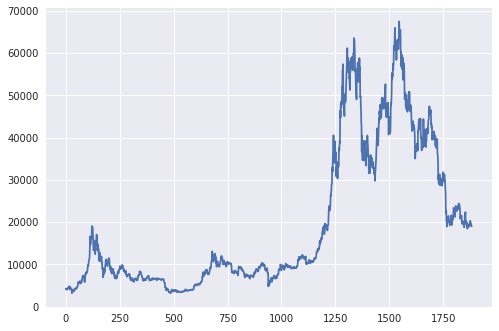

In [416]:
plt.style.use("seaborn")
plt.plot(df.index, df["close"])

In [417]:
close_array = df["close"].to_numpy()
close_array

array([ 4285.08,  4108.37,  4139.98, ..., 19439.02, 19131.87, 19032.94])

In [418]:
type(close_array)

numpy.ndarray

In [419]:
max_idx = argrelextrema(close_array, np.greater, order = 20)[0]
max_idx

array([  15,  121,  200,  262,  342,  384,  426,  556,  679,  722,  802,
        912,  995, 1020, 1097, 1241, 1305, 1336, 1361, 1398, 1482, 1545,
       1644, 1686, 1749, 1823, 1853, 1875])

In [420]:
min_idx = argrelextrema(close_array, np.less, order = 20)[0]
min_idx
len(min_idx)

26

In [421]:
e_idx = 0
for idx in df.index:
    if idx < min_idx[e_idx]:
        continue
    elif idx == min_idx[e_idx]:
        print("Minima found at value: ", f'{df["close"][idx]}')
        e_idx = e_idx + 1
        if e_idx == len(min_idx):
            break

Minima found at value:  4016.0
Minima found at value:  3189.02
Minima found at value:  6939.99
Minima found at value:  6601.39
Minima found at value:  5853.98
Minima found at value:  6144.01
Minima found at value:  6185.05
Minima found at value:  6252.68
Minima found at value:  3211.72
Minima found at value:  3398.4
Minima found at value:  7628.13
Minima found at value:  9439.59
Minima found at value:  9498.44
Minima found at value:  7412.41
Minima found at value:  6903.28
Minima found at value:  6623.82
Minima found at value:  4800.0
Minima found at value:  9012.0
Minima found at value:  10126.65
Minima found at value:  30366.15
Minima found at value:  31584.45
Minima found at value:  29790.35
Minima found at value:  40734.38
Minima found at value:  35071.42
Minima found at value:  18970.79
Minima found at value:  18461.36


In [422]:
df.iloc[max_idx]

,date,symbol,open,high,low,close
15,2017-09-01,BTC/USDT,4724.89,4885.55,4654.88,4834.91
121,2017-12-16,BTC/USDT,17539.83,19539.00,17190.01,19102.66
200,2018-03-04,BTC/USDT,11464.47,11565.00,11050.02,11515.00
262,2018-05-05,BTC/USDT,9714.00,10020.00,9682.00,9864.00
342,2018-07-24,BTC/USDT,7721.65,8486.00,7696.00,8397.24
384,2018-09-04,BTC/USDT,7263.00,7410.00,7227.17,7359.06
426,2018-10-16,BTC/USDT,6752.50,6900.00,6670.00,6759.27
556,2019-02-23,BTC/USDT,3962.00,4162.02,3933.15,4117.76
679,2019-06-26,BTC/USDT,11821.28,13970.00,11741.00,13093.80
722,2019-08-08,BTC/USDT,11975.04,12060.00,11521.00,11999.77


In [423]:
df.iloc[min_idx]

,date,symbol,open,high,low,close
4,2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00
28,2017-09-14,BTC/USDT,3944.69,3993.00,3165.13,3189.02
173,2018-02-05,BTC/USDT,8179.99,8382.80,6625.00,6939.99
233,2018-04-06,BTC/USDT,6770.00,6850.00,6500.00,6601.39
316,2018-06-28,BTC/USDT,6134.73,6173.01,5827.00,5853.98
359,2018-08-10,BTC/USDT,6529.79,6575.88,6026.39,6144.01
388,2018-09-08,BTC/USDT,6395.54,6478.00,6111.00,6185.05
421,2018-10-11,BTC/USDT,6630.21,6633.92,6205.00,6252.68
486,2018-12-15,BTC/USDT,3225.19,3276.50,3156.26,3211.72
540,2019-02-07,BTC/USDT,3407.00,3426.45,3390.00,3398.40


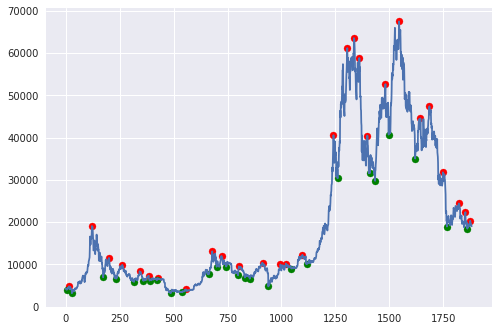

In [424]:
plt.figure(figsize = [48, 8])
plt.style.use("seaborn")
plt.plot(df.index, df["close"])
plt.scatter(df.iloc[max_idx].index, df.iloc[max_idx]["close"], color = "r")
plt.scatter(df.iloc[min_idx].index, df.iloc[min_idx]["close"], color = "g")

In [425]:
df['maxima'] = False
df['minima'] = False
df['maxima'].iloc[max_idx] = True
df['minima'].iloc[min_idx] = True
df

/tmp/ipykernel_560/1140532183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['maxima'].iloc[max_idx] = True
/tmp/ipykernel_560/1140532183.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['minima'].iloc[min_idx] = True


,date,symbol,open,high,low,close,maxima,minima
0,2017-08-17,BTC/USDT,4469.93,4485.39,4200.74,4285.08,False,False
1,2017-08-18,BTC/USDT,4285.08,4371.52,3938.77,4108.37,False,False
2,2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98,False,False
3,2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29,False,False
4,2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00,False,True
...,...,...,...,...,...,...,...,...
1878,2022-10-07,BTC/USDT,19960.67,20068.82,19320.00,19530.09,False,False
1879,2022-10-08,BTC/USDT,19530.09,19627.38,19237.14,19417.96,False,False
1880,2022-10-09,BTC/USDT,19416.52,19558.00,19316.04,19439.02,False,False
1881,2022-10-10,BTC/USDT,19439.96,19525.00,19020.25,19131.87,False,False
